In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'movies.csv')


In [4]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

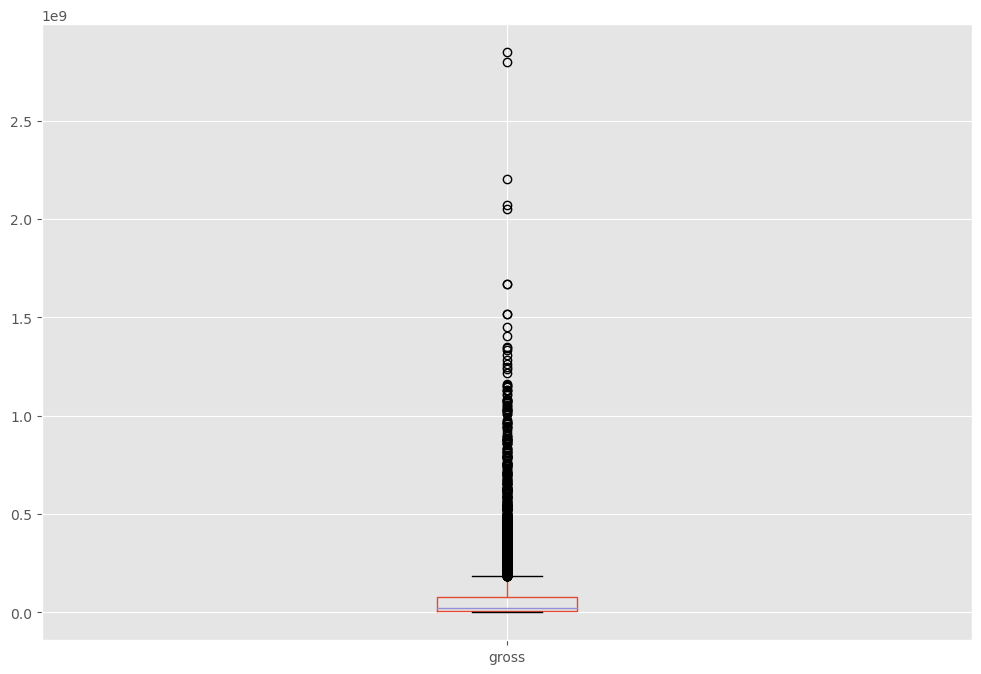

In [7]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [9]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<Axes: xlabel='gross', ylabel='budget'>

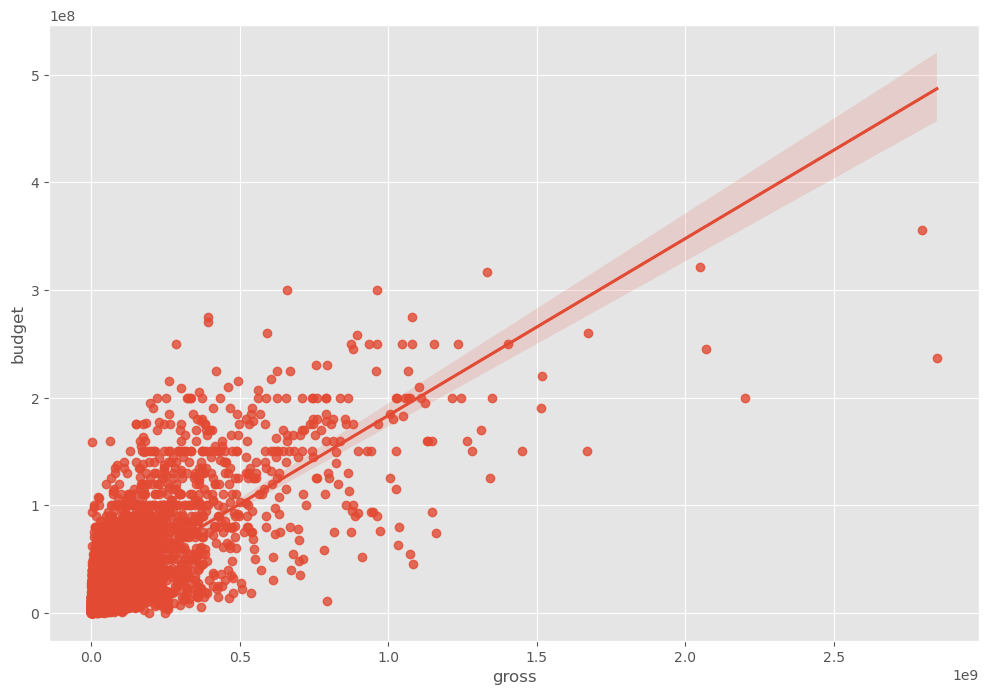

In [12]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

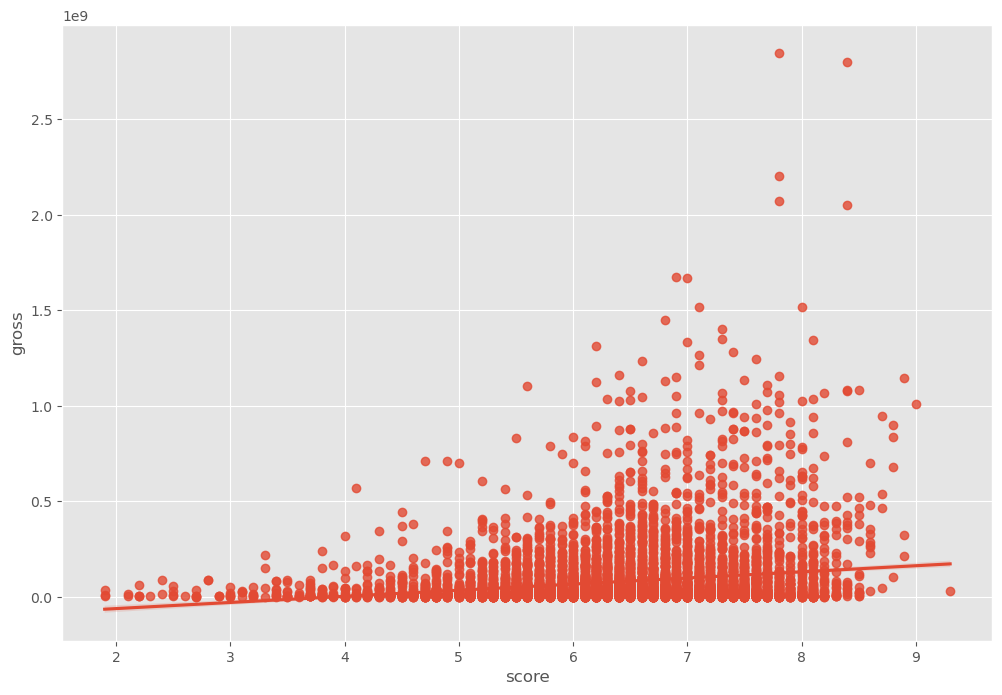

In [13]:
sns.regplot(x="score", y="gross", data=df)

In [60]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [61]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [170]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year,grosstotal,countrygrosstotal
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.035936,NaN
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,-0.076909,NaN
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,-0.092817,NaN
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,-0.083826,NaN
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,-0.045118,NaN
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.062077,NaN
grosstotal,0.035936,-0.076909,-0.092817,-0.083826,-0.045118,0.062077,1.000000,NaN
countrygrosstotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


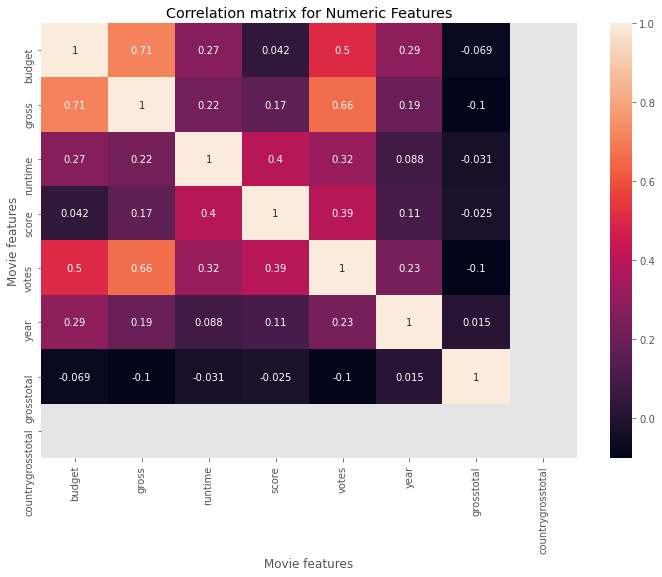

In [190]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [171]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.070302,-0.189282,0.480919,0.300018,0.978268,0.965431,-0.062005,0.370211,0.134315,0.009605,0.257396,0.955916,0.674068,-0.102399,0.020254,NaN,-0.099138
company,0.070302,1.000000,0.061540,0.155935,0.060236,0.101625,0.101876,0.000846,0.166275,-0.027840,0.031371,0.165490,0.089678,0.133796,0.105162,-0.008602,NaN,0.074285
country,-0.189282,0.061540,1.000000,-0.133631,-0.013013,-0.187801,-0.187762,0.124684,-0.051932,0.021056,0.012047,-0.054245,-0.181534,-0.146713,-0.004329,0.009149,NaN,-0.012557
director,0.480919,0.155935,-0.133631,1.000000,0.216499,0.507853,0.504802,-0.028938,0.292789,0.044193,0.036790,0.296325,0.497085,0.491595,0.030836,-0.009890,NaN,0.015255
genre,0.300018,0.060236,-0.013013,0.216499,1.000000,0.292627,0.288330,-0.024621,0.097809,0.031636,0.041309,0.098848,0.295037,0.230763,-0.003674,-0.017057,NaN,-0.003128
gross,0.978268,0.101625,-0.187801,0.507853,0.292627,1.000000,0.984267,-0.064561,0.422125,0.135257,0.013615,0.295385,0.974594,0.700464,-0.022809,0.019572,NaN,-0.026757
name,0.965431,0.101876,-0.187762,0.504802,0.288330,0.984267,1.000000,-0.065076,0.417623,0.130176,0.012255,0.292396,0.960618,0.695995,-0.023150,0.017110,NaN,-0.027272
rating,-0.062005,0.000846,0.124684,-0.028938,-0.024621,-0.064561,-0.065076,1.000000,-0.037900,0.035531,0.041838,0.000761,-0.060888,-0.056504,-0.013564,-0.010236,NaN,-0.020357
released,0.370211,0.166275,-0.051932,0.292789,0.097809,0.422125,0.417623,-0.037900,1.000000,0.070848,0.026386,0.211113,0.412720,0.315467,0.236153,-0.001076,NaN,0.225125
runtime,0.134315,-0.027840,0.021056,0.044193,0.031636,0.135257,0.130176,0.035531,0.070848,1.000000,0.054928,0.002983,0.137631,0.061594,0.011952,-0.005537,NaN,0.009247


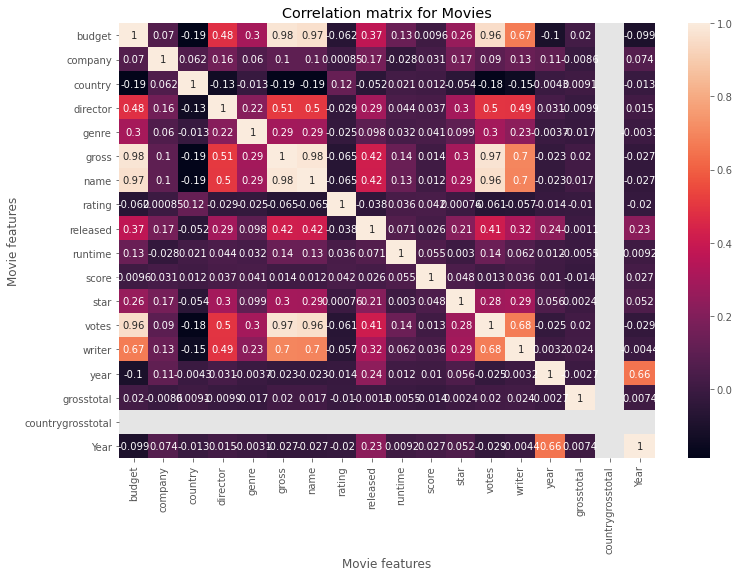

In [189]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [73]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company     0.070302
        country    -0.189282
        director    0.480919
        genre       0.300018
                      ...   
year    score       0.010438
        star        0.055951
        votes      -0.025407
        writer      0.003199
        year        1.000000
Length: 225, dtype: float64


In [74]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   budget     -0.189282
budget    country    -0.189282
country   gross      -0.187801
gross     country    -0.187801
country   name       -0.187762
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [75]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  name        0.504802
name      director    0.504802
gross     director    0.507853
director  gross       0.507853
budget    writer      0.674068
writer    budget      0.674068
          votes       0.677493
votes     writer      0.677493
name      writer      0.695995
writer    name        0.695995
gross     writer      0.700464
writer    gross       0.700464
budget    votes       0.955916
votes     budget      0.955916
name      votes       0.960618
votes     name        0.960618
budget    name        0.965431
name      budget      0.965431
votes     gross       0.974594
gross     votes       0.974594
budget    gross       0.978268
gross     budget      0.978268
          name        0.984267
name      gross       0.984267
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross   

In [130]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [14]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [140]:


df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,26183197.0
1+2 Seisaku Iinkai,2000,1136776.0
101st Street Films,1998,306715.0
10th Hole Productions,2010,103280.0
120 Films,2002,753501.0
...,...,...
Zucker Brothers Productions,1998,6940185.0
double A Films,2000,1568749.0
erbp,2013,444098.0


In [153]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year
Paramount Pictures                      2011    1486604229
Universal Pictures                      2015    1411831667
Warner Bros.                            2008    1327598616
                                        2010    1255477478
                                        2011    1217527619
                                        2005    1175793638
Twentieth Century Fox Film Corporation  2009    1173191407
Warner Bros.                            2006    1154792759
                                        2009    1146640373
Walt Disney Pictures                    2010    1134883375
Columbia Pictures                       2011    1072753462
Universal Pictures                      2013    1066421491
Warner Bros.                            2014    1062468828
Universal Pictures                      2007    1057955786
Columbia Pictures                       2012    1020616938
Name: gross, dtype: int64

In [179]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

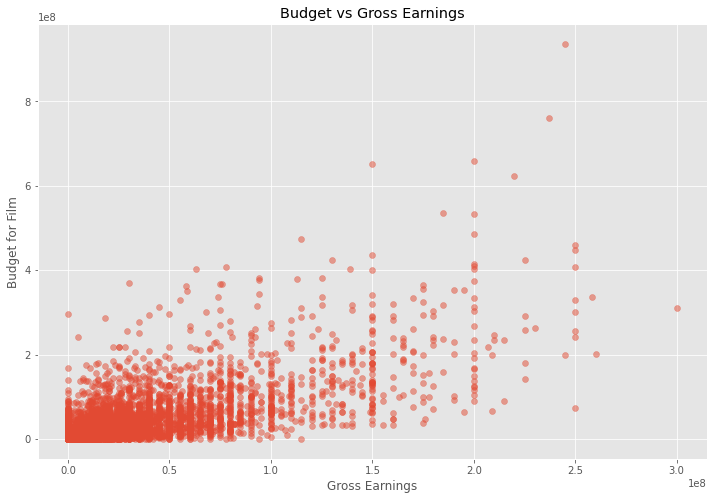

In [184]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [200]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [204]:
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,-0.068548,NaN,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,-0.107676,NaN,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.226889,NaN,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,-0.164934,NaN,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.095361,NaN,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,-0.100710,NaN,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,-0.081830,NaN,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,-0.211311,NaN,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187,0.007605,NaN,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,-0.030870,NaN,0.088342


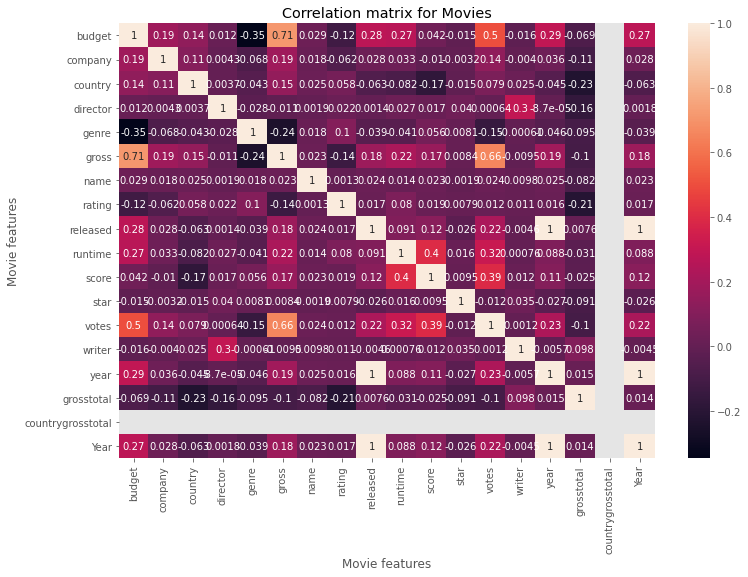

In [205]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()